In [1]:
!pip install newsapi-python


In [2]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [3]:
!pip install  chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.7 MB/s eta 0:00:00


In [4]:
!pip install  transformers


In [5]:
!pip install torch


In [6]:
!pip install pandas


In [7]:
import requests
import pandas as pd
from newsapi import NewsApiClient
from datetime import datetime, timedelta
from sentence_transformers import SentenceTransformer
import chromadb
from transformers import pipeline

FETCH NEWS ARTICLES FROM NEWS API

In [ ]:
from datetime import datetime, timedelta
from newsapi import NewsApiClient

# Initialize NewsAPI Client
newsapi = NewsApiClient(api_key="your_api_key")

def fetch_news(query, from_date, to_date, language="en", page_size=30):
    """Fetch news articles using NewsAPI"""
    all_articles = newsapi.get_everything(
        q=query,
        from_param=from_date,
        to=to_date,
        language=language,
        sort_by="relevancy",
        page_size=page_size,
    )

    return [
        {
            "title": article.get("title", "No Title"),
            "url": article.get("url", "No URL"),
            "content": article.get("content") or article.get("description") or "No Content"
        }
        for article in all_articles.get("articles", [])
    ]


def analyze_sentiment(news_data):
    """Analyzes sentiment of news articles and returns enriched data"""
    results = []

    for article in news_data:
        content = article.get("content", "")
        if content:

            try:
                analysis = sentiment_pipeline(content[:512])[0]  # Limit to 512 chars
                sentiment = analysis["label"]
                confidence = analysis["score"]
            except Exception:
                sentiment = "Unknown"
                confidence = None
        else:
            sentiment = "No Content"
            confidence = None

        results.append({
            "title": article.get("title", "N/A"),
            "url": article.get("url", "N/A"),
            "sentiment": sentiment,
            "confidence": confidence
        })

    return pd.DataFrame(results)

# Format and display results
def format_news(news_list):
    """Format news articles into a readable format"""
    formatted_news = ""
    for i, article in enumerate(news_list[:10], 1):  # Show first n articles
        formatted_news += f"🔹 **Article {i}:**\n"
        formatted_news += f"**Title:** {article['title']}\n"
        formatted_news += f"**URL:** {article['url']}\n"
        formatted_news += f"**Summary:** {article['content']}\n"
        formatted_news += "-" * 50 + "\n"
    return formatted_news

# ✅ Fetch news data before calling format_news
current_time = datetime.now()
time_5_days_ago = current_time - timedelta(days=5)

news_data = fetch_news(
    query="stock market",
    from_date=time_5_days_ago.strftime('%Y-%m-%d'),
    to_date=current_time.strftime('%Y-%m-%d')
)

print(format_news(news_data))


🔹 **Article 1:**
**Title:** Stocks Plunge After Trump Declares Web Rumor on Tariffs ‘Fake News’
**URL:** https://gizmodo.com/stocks-plunge-after-trump-declares-web-rumor-on-tariffs-fake-news-2000585932
**Summary:** The stock market went on a rollercoaster ride this morning, shooting upwards after news circulated online that President Donald Trump was considering a 90-day pause of his global tariff policy. Howev… [+4104 chars]
--------------------------------------------------
🔹 **Article 2:**
**Title:** Trump's tariffs have shaken the markets - how worried should we be?
**URL:** https://www.bbc.com/news/articles/c77njdlvj66o
**Summary:** Simon Jack
As stock markets continue to tumble after the US imposition of sweeping and swingeing tariffs, many are asking does this qualify as a stock market "crash" and what that could mean for the… [+3227 chars]
--------------------------------------------------
🔹 **Article 3:**
**Title:** Nintendo Delays Switch 2 Preorders Thanks to Trump’s Tariffs


In [10]:
# Load sentence transformer model
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def generate_embeddings(texts):
    """Generate embeddings for a list of texts"""
    return embedding_model.encode(texts, convert_to_tensor=True)

# Generate embeddings for news content
news_texts = [article["content"] for article in news_data]
news_embeddings = generate_embeddings(news_texts)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
# Initialize ChromaDB client
chroma_client = chromadb.PersistentClient(path="/content/chroma_db")

# Create a collection
collection = chroma_client.get_or_create_collection(name="news_articles")

# Insert news articles with embeddings
for idx, article in enumerate(news_data):
    collection.add(
        ids=[str(idx)],
        documents=[article["content"]],
        metadatas=[{"title": article["title"], "url": article["url"]}],
        embeddings=[news_embeddings[idx].tolist()]
    )
print("✅ News articles stored in ChromaDB!")


✅ News articles stored in ChromaDB!


In [12]:
def format_sentiment_results(df, num_results=5):
    """Format sentiment analysis results for human readability."""
    num_results = min(num_results, len(df))  # Ensure we don't exceed available results
    formatted_results = "\n📊 **Sentiment Analysis of News Articles:**\n"

    if num_results == 0:
        formatted_results += "\n⚠️ No news articles found for sentiment analysis.\n"
        return formatted_results

    for i, row in df.head(num_results).iterrows():
        formatted_results += f"\n🔹 **Article {i+1}:**\n"
        formatted_results += f"**Title:** {row.get('title', 'N/A')}\n"
        formatted_results += f"**URL:** {row.get('url', 'N/A')}\n"

        sentiment = row.get('sentiment', 'N/A')
        confidence = row.get('confidence', None)

        try:
            confidence_str = f"{float(confidence):.2f}" if pd.notna(confidence) else "N/A"
        except (ValueError, TypeError):
            confidence_str = "N/A"

        formatted_results += f"**Sentiment:** {sentiment} (Confidence: {confidence_str})\n"
        formatted_results += "-" * 60 + "\n"

    return formatted_results

In [13]:
# Step 1: Fetch news from last 5 days
current_time = datetime.now()
time_5_days_ago = current_time - timedelta(days=5)

news_data = fetch_news(
    query="stock market",
    from_date=time_5_days_ago.strftime('%Y-%m-%d'),
    to_date=current_time.strftime('%Y-%m-%d')
)

# Optional: Display raw news data
# print(format_news(news_data))
sentiment_pipeline = pipeline("sentiment-analysis")
# Step 2: Analyze sentiment
df_sentiments = analyze_sentiment(news_data)

# Step 3: Format and display output
print(format_sentiment_results(df_sentiments, num_results=10))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu



📊 **Sentiment Analysis of News Articles:**

🔹 **Article 1:**
**Title:** Stocks Plunge After Trump Declares Web Rumor on Tariffs ‘Fake News’
**URL:** https://gizmodo.com/stocks-plunge-after-trump-declares-web-rumor-on-tariffs-fake-news-2000585932
**Sentiment:** POSITIVE (Confidence: 0.57)
------------------------------------------------------------

🔹 **Article 2:**
**Title:** Trump's tariffs have shaken the markets - how worried should we be?
**URL:** https://www.bbc.com/news/articles/c77njdlvj66o
**Sentiment:** NEGATIVE (Confidence: 1.00)
------------------------------------------------------------

🔹 **Article 3:**
**Title:** Nintendo Delays Switch 2 Preorders Thanks to Trump’s Tariffs
**URL:** https://www.wired.com/story/nintendo-delays-switch-2-pre-orders-over-trump-tariffs/
**Sentiment:** NEGATIVE (Confidence: 1.00)
------------------------------------------------------------

🔹 **Article 4:**
**Title:** Trump says he doesn't want stocks to crater, but 'sometimes you have to take

In [14]:
def classify_sentiments(df):
    """Classify the total number of positive, negative, and neutral sentiments."""
    sentiment_counts = df["sentiment"].value_counts().reset_index()
    sentiment_counts.columns = ["Sentiment", "Count"]
    return sentiment_counts

# ✅ Get Sentiment Counts
df_sentiment_counts = classify_sentiments(df_sentiments)

# ✅ Display as a table
print("\n📊 **Sentiment Classification Table:**")
print(df_sentiment_counts)



📊 **Sentiment Classification Table:**
  Sentiment  Count
0  NEGATIVE     24
1  POSITIVE      6


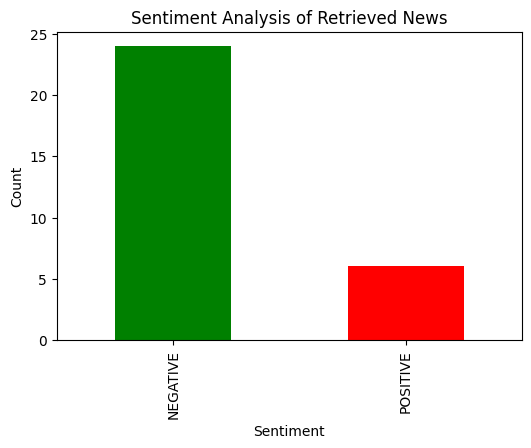

In [15]:
import matplotlib.pyplot as plt

# ✅ Count Sentiment Categories
sentiment_counts = df_sentiments["sentiment"].value_counts()

# ✅ Plot Sentiment Distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"])
plt.title("Sentiment Analysis of Retrieved News")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
